## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from matplotlib.patches import Circle, PathPatch
import scipy.integrate as integrate
import numpy as np
from scipy.optimize import curve_fit
import cmath
import csv
from scipy.special import factorial 

## Mathematical Functions

In [2]:
def singleIndex(n,m):
    return (n*(n+2)+m)/2

In [3]:
def fromNoll(j):
    n = 0
    m = 0
    while (j > n):
        n += 1
        j -= n
    m = -n+2*j
    return n,m

In [4]:
def polar(x,y):
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    return r,phi

In [5]:
def cartesian(r,theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x,y

In [6]:
def zernikeTheta(m,theta):
    if (m >= 0):
        return np.cos(m*theta)
    else:
        return np.sin(-m*theta)

In [7]:
def zernikeRadial(n,m,r):
    m = abs(m)
    if (m > n):
        print('Error: n must be greater than or equal to n!')
        return 0
    if (((n-m)%2) > 0):
        print('Error: (n - m) must be even!')
        return 0
    kArray = np.linspace(0,(n-m)/2,int((n-m)/2+1))
    rArray = 0
    i = 0
    for k in kArray:
        rArray=rArray+(r**(n-2*k))*((-1)**k)*factorial(n-k)/(factorial(k)*factorial((n+m)/2-k)*factorial((n-m)/2-k))
        i = i+1
    return rArray

In [8]:
def normalization(n,m):
    if (m == 0) :
        a = 2*np.pi
    else:
        a = 1*np.pi
    return np.sqrt((2*n+2)/a)

In [9]:
def zernike(n,m,x,y):
    if (m == 0) :
        a = 2*np.pi
    else:
        a = 1*np.pi
    r,theta = polar(x,y)
    return zernikeTheta(m,theta)*zernikeRadial(n,m,r)*(np.sqrt((2*n+2)/a))

In [10]:
def zernikePolar(n,m,r,theta):
    if (m == 0) :
        a = 2*np.pi
    else:
        a = 1*np.pi
    return zernikeTheta(m,theta)*zernikeRadial(n,m,r)*(np.sqrt((2*n+2)/a))

In [11]:
def zernikeFit(X,*param):
    x,y = X
    height = param[0]*zernike(fromNoll(0)[0],fromNoll(0)[1],x,y)
    for k in range(1,41):
        height += param[k]*zernike(fromNoll(k)[0],fromNoll(k)[1],x,y)
    return height

## Verifying Orthogonality

In [12]:
n = 5
m = 1
#def integrand(r,theta):
 #   return r*zernikePolar(n,m,r,theta)**2
f = lambda theta, r: r*zernikePolar(4,0,r,theta)*zernikePolar(4,2,r,theta)
print(integrate.dblquad(f, 0, 1, lambda r: 0, lambda r: 2*np.pi))
print(np.pi/(2*2+2))

(-7.243814608430614e-17, 9.871058785287423e-09)
0.5235987755982988


## DM Lookup Table

In [13]:
def DM_Array_Index(x1,y1,ratio,xcenter,ycenter):
    y1 = -y1
    rNew = polar(x1,y1)[0]*ratio
    theta = polar(x1,y1)[1]
    x2,y2 = cartesian(rNew,theta)
    x3 = x2+xcenter
    y3 = y2+ycenter
    return int(x3),int(y3)

In [14]:
def DM_Index_Array(index_X,index_Y,ratio,xcenter,ycenter):
    x2 = index_X-xcenter
    y2 = index_Y-ycenter
    theta = polar(x2,y2)[1]
    r = polar(x2,y2)[0]
    rNew = r/ratio
    x1,y1 = cartesian(rNew,theta)
    return x1,-y1

In [15]:
inc = 1.0/(3)
def DM_Lookup(argument):
    switcher = {
        0: [-2*inc,6*inc],
        1: [-1*inc,6*inc],
        2: [0,6*inc],
        3: [1*inc,6*inc],
        4: [2*inc,6*inc],
        5: [-4*inc,5*inc],
        6: [-3*inc,5*inc],
        7: [-2*inc,5*inc],
        8: [-1*inc,5*inc],
        9: [-0*inc,5*inc],
        10: [1*inc,5*inc],
        11: [2*inc,5*inc],
        12: [3*inc,5*inc],
        13: [4*inc,5*inc],
        14: [-5*inc,4*inc],
        15: [-4*inc,4*inc],
        16: [-3*inc,4*inc],
        17: [-2*inc,4*inc],
        18: [-1*inc,4*inc],
        19: [0,4*inc],
        20: [1*inc,4*inc],
        21: [2*inc,4*inc],
        22: [3*inc,4*inc],
        23: [4*inc,4*inc],
        24: [5*inc,4*inc],
        25: [-5*inc,3*inc],
        26: [-4*inc,3*inc],
        27: [-3*inc,3*inc],
        28: [-2*inc,3*inc],
        29: [-1*inc,3*inc],
        30: [0,3*inc],
        31: [1*inc,3*inc],
        32: [2*inc,3*inc],
        33: [3*inc,3*inc],
        34: [4*inc,3*inc],
        35: [5*inc,3*inc],
        36: [-6*inc,2*inc],
        37: [-5*inc,2*inc],
        38: [-4*inc,2*inc],
        39: [-3*inc,2*inc],
        40: [-2*inc,2*inc],
        41: [-1*inc,2*inc],
        42: [0,2*inc],
        43: [1*inc,2*inc],
        44: [2*inc,2*inc],
        45: [3*inc,2*inc],
        46: [4*inc,2*inc],
        47: [5*inc,2*inc],
        48: [6*inc,2*inc],
        49: [-6*inc,inc],
        50: [-5*inc,inc],
        51: [-4*inc,inc],
        52: [-3*inc,inc],
        53: [-2*inc,inc],
        54: [-1*inc,inc],
        55: [0,inc],
        56: [1*inc,inc],
        57: [2*inc,inc],
        58: [3*inc,inc],
        59: [4*inc,inc],
        60: [5*inc,inc],
        61: [6*inc,inc],
        62: [-6*inc,0],
        63: [-5*inc,0],
        64: [-4*inc,0],
        65: [-3*inc,0],
        66: [-2*inc,0],
        67: [-inc,0],
        68: [0,0],
        69: [inc,0],
        70: [2*inc,0],
        71: [3*inc,0],
        72: [4*inc,0],
        73: [5*inc,0],
        74: [6*inc,0],
        75: [-6*inc,-inc],
        76: [-5*inc,-inc],
        77: [-4*inc,-inc],
        78: [-3*inc,-inc],
        79: [-2*inc,-inc],
        80: [-1*inc,-inc],
        81: [0,-inc],
        82: [inc,-inc],
        83: [2*inc,-inc],
        84: [3*inc,-inc],
        85: [4*inc,-inc],
        86: [5*inc,-inc],
        87: [6*inc,-inc],
        88: [-6*inc,-2*inc],
        89: [-5*inc,-2*inc],
        90: [-4*inc,-2*inc],
        91: [-3*inc,-2*inc],
        92: [-2*inc,-2*inc],
        93: [-1*inc,-2*inc],
        94: [0*inc,-2*inc],
        95: [1*inc,-2*inc],
        96: [2*inc,-2*inc],
        97: [3*inc,-2*inc],
        98: [4*inc,-2*inc],
        99: [5*inc,-2*inc],
        100: [6*inc,-2*inc],
        101: [-5*inc,-3*inc],
        102: [-4*inc,-3*inc],
        103: [-3*inc,-3*inc],
        104: [-2*inc,-3*inc],
        105: [-1*inc,-3*inc],
        106: [0,-3*inc],
        107: [1*inc,-3*inc],
        108: [2*inc,-3*inc],
        109: [3*inc,-3*inc],
        110: [4*inc,-3*inc],
        111: [5*inc,-3*inc],
        112: [-5*inc,-4*inc],
        113: [-4*inc,-4*inc],
        114: [-3*inc,-4*inc],
        115: [-2*inc,-4*inc],
        116: [-1*inc,-4*inc],
        117: [0,-4*inc],
        118: [1*inc,-4*inc],
        119: [2*inc,-4*inc],
        120: [3*inc,-4*inc],
        121: [4*inc,-4*inc],
        122: [5*inc,-4*inc],
        123: [-4*inc,-5*inc],
        124: [-3*inc,-5*inc],
        125: [-2*inc,-5*inc],
        126: [-1*inc,-5*inc],
        127: [0,-5*inc],
        128: [1*inc,-5*inc],
        129: [2*inc,-5*inc],
        130: [3*inc,-5*inc],
        131: [4*inc,-5*inc],
        132: [-2*inc,-6*inc],
        133: [-1*inc,-6*inc],
        134: [0,-6*inc],
        135: [1*inc,-6*inc],
        136: [2*inc,-6*inc]
    }
    return np.array(switcher.get(argument, "Invalid Entry"))

## Program Pure Zernike Polynomials

In [21]:
import os

In [23]:
def programPureZernike(amplitudes,file1,file2):
    vals = []
    inc = 1/3
    flatVoltage = np.linspace(0, 136, 137)
    newVoltage = np.linspace(0, 136, 137)
    sign=0
    with open('C:/Users/Regal-Lab/Code/Data-Analysis-Code/DM_Profiles/25CW012#060_CLOSED_LOOP_COMMANDS.txt', newline='') as csvfile:
        DM_Reader = csv.reader(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_NONNUMERIC)
        i = 0
        for row in DM_Reader:
            flatVoltage[i]=row[0]
            i=i+1
    try:
        with open(file2, 'w', newline='') as csvfile:
            DM_Writer = csv.writer(csvfile, delimiter=' ',
                                quotechar ='|', quoting=csv.QUOTE_MINIMAL)
            for i in range(0,137):
                sign=0
                weightFactor = 1#np.exp(2*(DM_Lookup(i)[0]**2+DM_Lookup(i)[1]**2))
                if (DM_Lookup(i)[0]**2+DM_Lookup(i)[1]**2)>1:
                    weightFactor =0# 0.000001
                for j in range(45):
                    sign  += amplitudes[j]*zernike(fromNoll(j)[0],fromNoll(j)[1],DM_Lookup(i)[0],DM_Lookup(i)[1])
                    #print(j,amplitudes[j],fromNoll(j)[0],fromNoll(j)[1])
                negVolt = -sign**2*weightFactor+flatVoltage[i]
                posVolt = sign**2*weightFactor+flatVoltage[i]

                if (sign <= 0):
                    if negVolt < 0:
                        raise ValueError('Voltage too small')
                    DM_Writer.writerow([negVolt])
                    vals.append(negVolt)
                    #if (negVolt < 0.0):
                        #print(negVolt,i)
                if (sign > 0):
                    if posVolt > 1:
                        raise ValueError('Voltage too large')
                    DM_Writer.writerow([posVolt])
                    vals.append(posVolt)
                    #if (posVolt > 1.0):
                        #print(posVolt,i)
    except ValueError:
            os.remove(file2)
            raise ValueError("Voltage out of bounds of DM")
    return vals

In [17]:
fromNoll(7) # I use the Noll index notation, to see the (n,m) coefficients

(3, -1)

In [18]:
inc = 1/3 # Defines Zernike Polynomial Radius, I found experimentally a radius of 3 as set here, gives the best result
currentAmps = np.linspace(0,0,45) 
currentAmps[7] = 0.12   #Sets coma to have an amplitude of 0.17

Example

In [24]:
programPureZernike(currentAmps,'27CW012#060_CLOSED_LOOP_COMMANDS.txt','coma_test.txt')

In [35]:
singleIndex(2,-2)

3.0

In [108]:
singleIndex(3,-1)

7.0

Scan1: 

In [25]:
for val in np.arange(-0.45, 0.45, 0.01):
    
    currentAmps = np.linspace(0,0,45) 
    currentAmps[5] = 0.1
    currentAmps[3] = 0
    currentAmps[8] = val
    currentAmps[7] = 0.2
    try:
        programPureZernike(currentAmps,'C:/Users/Regal-Lab/Code/Data-Analysis-Code/DM_Profiles/27CW012#060_CLOSED_LOOP_COMMANDS.txt','DM_Profiles/Scan6_' + str(int(100*val)) + '.txt')
        print('.',end='')
    except ValueError:
        print('x',end='')

xxxxxxxxxxxxxxxxx.........................................................xxxxxxxxxxxxxxxx

### mark's plots

In [79]:
def makeIm(actuatorValueList):
    pic = np.zeros((13,13))
    rowOff = [4,2,1,1,0,0,0,0,0,1,1,2,4]
    tc = 0
    for i, rowO in enumerate(rowOff):
        numInRow = (7-(rowO+1))*2+1
        for j in range(numInRow):
            pic[i][rowO+j] = actuatorValueList[tc]
            tc += 1
    return pic

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
currentAmps = np.linspace(0,0,45) 
#currentAmps[5] = 0.1
#currentAmps[3] = val
res0 = programPureZernike(currentAmps,'C:/Users/Regal-Lab/Code/Data-Analysis-Code/DM_Profiles/25CW012#060_CLOSED_LOOP_COMMANDS.txt','DM_Profiles/x0x' + str(int(100*val)) + '.txt')
currentAmps = np.linspace(0,0,45) 
currentAmps[5] = 0
currentAmps[3] = 0
currentAmps[8] = 0.3
currentAmps[7] = 0.3
res = programPureZernike(currentAmps,'C:/Users/Regal-Lab/Code/Data-Analysis-Code/DM_Profiles/25CW012#060_CLOSED_LOOP_COMMANDS.txt','DM_Profiles/xxx' + str(int(100*val)) + '.txt')

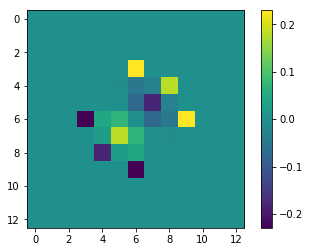

In [113]:
plt.imshow(makeIm(res)-makeIm(res0))
plt.colorbar()